In [30]:
import cv2
import numpy as np
import os
import pandas as pd
from pathlib import Path
# For Jupyter Notebook, it's better to use matplotlib
from matplotlib import pyplot as plt
import matplotlib.patches as patches
from matplotlib import rcParams
%matplotlib inline

In [13]:
root = Path(os.getcwd()).parent
print(root)

d:\WORK\learn\cap_detection


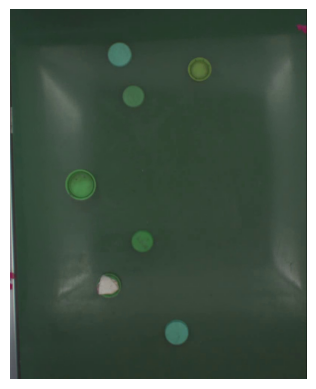

In [ ]:
file_path = root / 'sample' / 'raw-250110_dc_s001_b2_3.jpg'  # Make sure this path is correct
image = cv2.imread(str(file_path))  # Convert Path to string

if image is None:
    print("Error: Could not read the image. Please check the file path.")
else:
    # Convert BGR to RGB
    image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
  
    plt.imshow(image_rgb)
    plt.axis('off')  # Optional: to remove axis
    plt.show()

In [21]:
data_path = root / 'sample' / 'raw-250110_dc_s001_b2_3.txt'
data = pd.read_csv(data_path, header=None, sep=' ', names=["class_id", 'x', 'y', 'w', 'h'])
data

,class_id,x,y,w,h
0,0,0.368569,0.124068,0.083712,0.066232
1,0,0.637956,0.163347,0.083212,0.064429
2,0,0.561556,0.872740,0.082888,0.066764
3,0,0.445731,0.629018,0.077262,0.057655
4,0,0.237806,0.475140,0.105938,0.083527
5,0,0.333550,0.746959,0.082850,0.062295
6,0,0.416162,0.237465,0.076800,0.057515


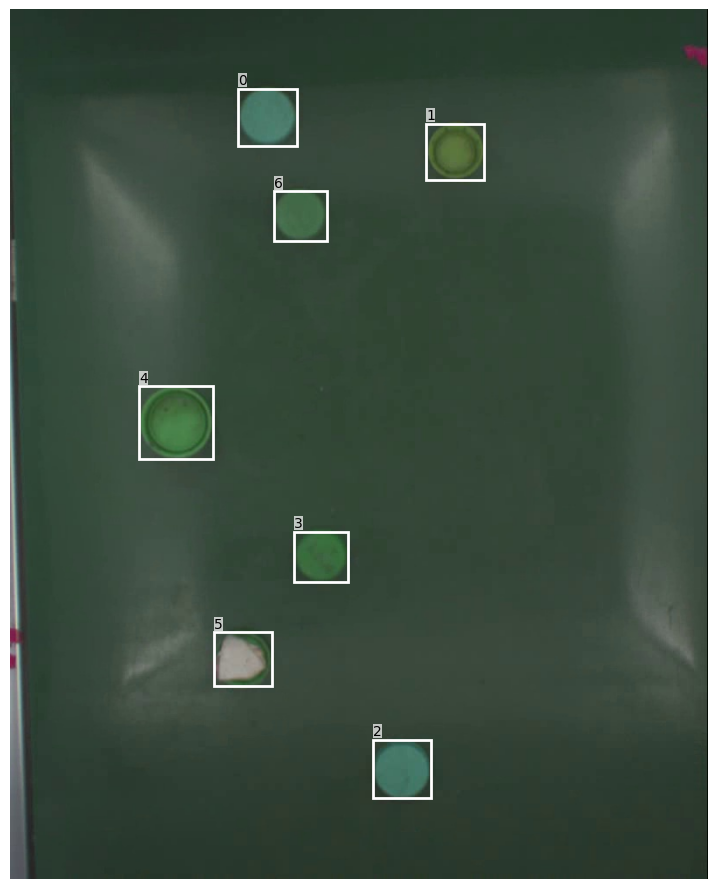

In [33]:
# Set up the plot
def plot_image_with_boxes(image_path, df):
    # Read the image
    image = cv2.imread(str(image_path))
    if image is None:
        print(f"Error: Could not read image at {image_path}")
        return
    
    # Convert from BGR to RGB
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    height, width = image.shape[:2]
    
    # Create figure and axes
    fig, ax = plt.subplots(1, figsize=(12, 9))
    
    # Display the image
    ax.imshow(image)
    
    # Define colors for different classes
    colors = ['red', 'blue', 'green', 'orange', 'purple', 'yellow']
    
    # Draw each bounding box
    for i, row in df.iterrows():
        class_id = i
        x_center = float(row['x']) * width
        y_center = float(row['y']) * height
        box_width = float(row['w']) * width
        box_height = float(row['h']) * height
        
        # Calculate top-left corner coordinates
        x = x_center - (box_width / 2)
        y = y_center - (box_height / 2)
        
        # Create a rectangle patch
        rect = patches.Rectangle(
            (x, y), box_width, box_height, 
            linewidth=2, 
            edgecolor='white', 
            facecolor='none'
        )
        
        # Add the patch to the Axes
        ax.add_patch(rect)
        
        # Add class label
        label_name = i
        ax.text(
            x, y - 5, 
            label_name, 
            color='black',
            fontsize=10,
            bbox=dict(facecolor='white', alpha=0.7, edgecolor='none', pad=0)
        )
    
    plt.axis('off')
    plt.tight_layout()
    plt.show()

# Example usage
image_path = root / 'sample' / 'raw-250110_dc_s001_b2_3.jpg'

# Plot the image with bounding boxes
plot_image_with_boxes(image_path, data)

In [29]:
# from the above image we could see that the index 0,2 is have color light blue while the rest have color others,
# this means we can label two of them as 0, and the rest is 2

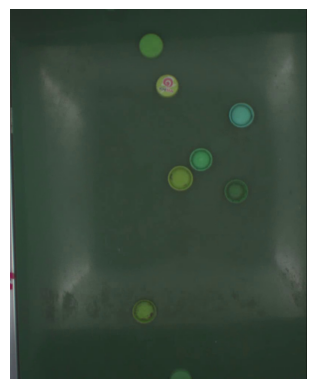

In [31]:
file_path_2 = root / 'sample/raw-250110_dc_s001_b2_15.jpg'  # Make sure this path is correct
image = cv2.imread(str(file_path_2))  # Convert Path to string

if image is None:
    print("Error: Could not read the image. Please check the file path.")
else:
    # Convert BGR to RGB
    image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
  
    plt.imshow(image_rgb)
    plt.axis('off')  # Optional: to remove axis
    plt.show()

In [32]:
data_path = root / 'sample' / 'raw-250110_dc_s001_b2_15.txt'
data_2 = pd.read_csv(data_path, header=None, sep=' ', names=["class_id", 'x', 'y', 'w', 'h'])
data_2

,class_id,x,y,w,h
0,0,0.475406,0.100271,0.084588,0.065671
1,0,0.760931,0.494023,0.084563,0.066603
2,0,0.643656,0.407169,0.081938,0.063437
3,0,0.573400,0.458712,0.087775,0.067405
4,0,0.452625,0.818968,0.083875,0.063387
5,0,0.529713,0.209544,0.079550,0.062114
6,0,0.780906,0.287811,0.086412,0.066864


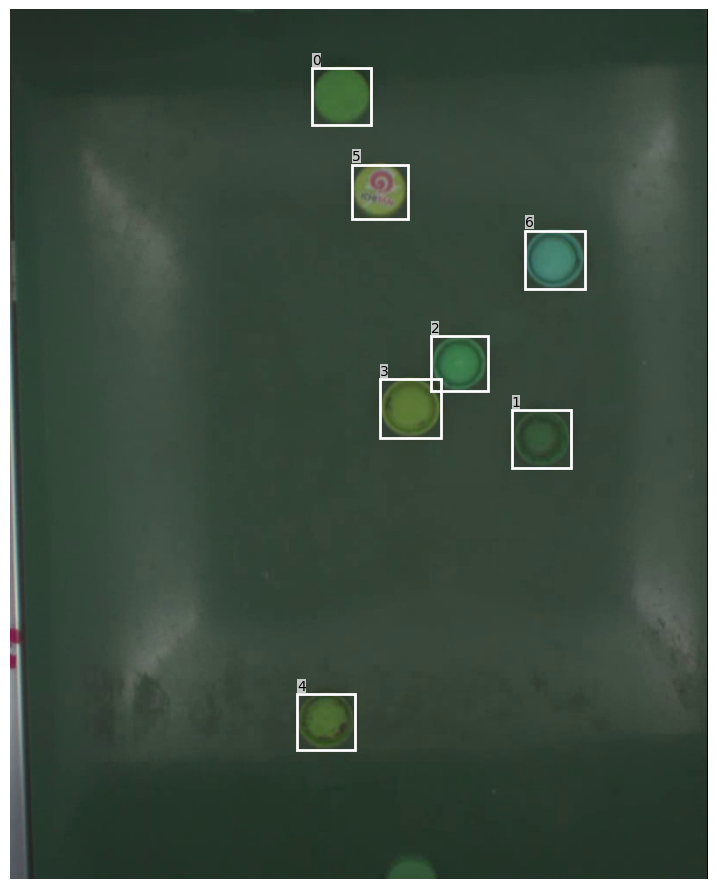

In [34]:
# Plot the image with bounding boxes
plot_image_with_boxes(file_path_2, data_2)

In [ ]:
# as we can see above that the light blue is having index 6. while the rest is color others